In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['font.size'] = 13
fig_path = '/home/gabriel/practicaldl/latex/figures/supervised/'

In [2]:
N_train = 400
N_test = 100
noise = 50
X_train = np.random.randint(low=200,high=2000,size=N_train)
X_test = np.random.randint(low=200,high=2000,size=N_test)

Y_train = 0.5*X_train + noise*np.random.randn(N_train)*1.5*X_train/np.mean(X_train)+5e1
Y_test = 0.5*X_test + 1e-4*X_test**2 + noise*np.random.randn(N_test)*1.5*X_test/np.mean(X_test)+5e1

In [3]:
for i in range(10):
    print "Square feet = {}, House price = {}".format(X_train[i],Y_train[i])

Square feet = 553, House price = 336.389209761
Square feet = 226, House price = 183.716934611
Square feet = 524, House price = 311.951797695
Square feet = 477, House price = 307.625314743
Square feet = 473, House price = 262.521216413
Square feet = 1929, House price = 1023.14127026
Square feet = 515, House price = 291.311521393
Square feet = 1357, House price = 723.385494721
Square feet = 909, House price = 615.201234431
Square feet = 742, House price = 377.962694702


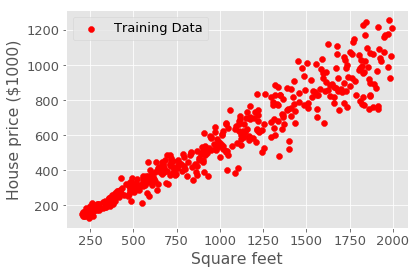

In [4]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.xlabel('Square feet')
plt.ylabel('House price ($1000)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fig_path+'house1.pdf',dpi=600)
plt.show()

In [5]:
std = np.std(X_train)
mu = np.mean(X_train)
X_train = (X_train-mu)/std
X_test = (X_test-mu)/std

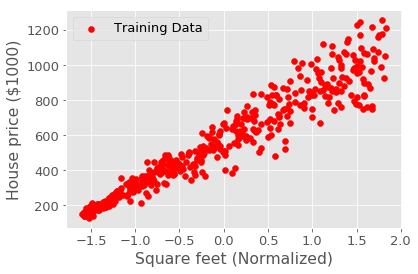

In [6]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.xlabel('Square feet (Normalized)')
plt.ylabel('House price ($1000)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fig_path+'house_norm.pdf',dpi=600)
plt.show()

In [7]:
Yhat_1 = 350*X_train + 600
Yhat_2 = 300*X_train + 600
Yhat_3 = 200*X_train + 600

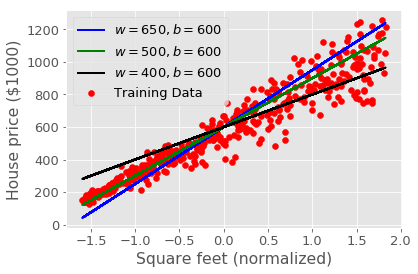

In [18]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.plot(X_train,Yhat_1, color='b',linewidth=2, label=r'$w=650, b=600$')
plt.plot(X_train,Yhat_2, color='g',linewidth=2, label=r'$w=500, b=600$')
plt.plot(X_train,Yhat_3, color='k',linewidth=2, label=r'$w=400, b=600$')
plt.xlabel('Square feet (normalized)')
plt.ylabel('House price ($1000)')
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig(fig_path+'house_linear.pdf',dpi=600)
plt.show()

In [9]:
def MSE(Y,Yhat):
    return np.mean((Y-Yhat)**2)

In [10]:
print "Error for w=650, b=600 is: {}".format(MSE(Y_train,Yhat_1))
print "Error for w=500, b=600 is: {}".format(MSE(Y_train,Yhat_2))
print "Error for w=400, b=600 is: {}".format(MSE(Y_train,Yhat_3))


Error for w=650, b=600 is: 14143.3703813
Error for w=500, b=600 is: 8535.36050453
Error for w=400, b=600 is: 12319.3407509


In [11]:
def gradient(x,y,w,b):
    yhat = w*x+b
    return -2*np.mean((y-yhat)*x),-2*np.mean(y-yhat)

In [12]:
learning_rate = 2e-2
N_iterations = 100
w = 1.0
b = 100
print_every = 10
train_loss = []
test_loss = []
iters = []
weights = []
biases = []
for i in range(N_iterations):
        g = gradient(X_train,Y_train,w,b)
        w = w-learning_rate*g[0]
        b = b-learning_rate*g[1]
        if (i+1)%print_every == 0:
            Yhat = w*X_train+b
            e = MSE(Y_train,Yhat)
            train_loss.append(e)
            
            Yhat_test = w*X_test+b
            e_test = MSE(Y_test,Yhat_test)
            test_loss.append(e_test)
            
            iters.append(i)
            weights.append(w)
            biases.append(b)
            print "Iteration {}: w={}, MSE_train = {}, MSE_test = {}".format(i,w,e,e_test)

Iteration 9: w=90.7980070613, MSE_train = 138776.249055, MSE_test = 309912.839414
Iteration 19: w=150.498652803, MSE_train = 65236.4744392, MSE_test = 190849.796562
Iteration 29: w=190.189590481, MSE_train = 32731.715072, MSE_test = 128400.235872
Iteration 39: w=216.577421203, MSE_train = 18364.532319, MSE_test = 94266.4571702
Iteration 49: w=234.12091226, MSE_train = 12014.2025742, MSE_test = 74837.2745611
Iteration 59: w=245.784397664, MSE_train = 9207.34137103, MSE_test = 63362.8456343
Iteration 69: w=253.53866341, MSE_train = 7966.70188768, MSE_test = 56371.9591027
Iteration 79: w=258.693952346, MSE_train = 7418.33621647, MSE_test = 52006.049362
Iteration 89: w=262.121356678, MSE_train = 7175.95725514, MSE_test = 49228.0327893
Iteration 99: w=264.400006936, MSE_train = 7068.82516431, MSE_test = 47436.1825689


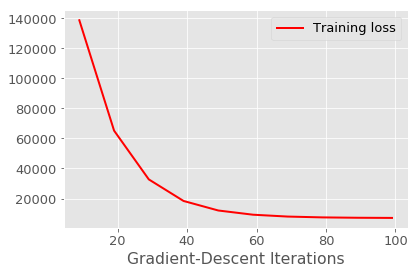

In [13]:
plt.plot(iters,train_loss,linewidth=2,color='r',label='Training loss')
#plt.plot(iters,test_loss, linewidth=2, color='g', label='Test loss')
plt.xlabel('Gradient-Descent Iterations')
plt.legend()
plt.tight_layout()
plt.savefig(fig_path+'loss.pdf',dpi=600)
plt.show()

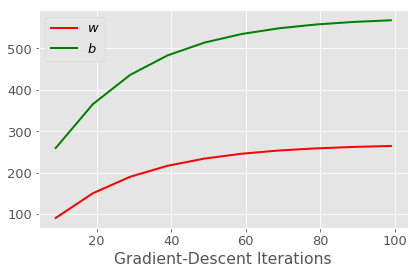

In [14]:
plt.plot(iters,weights,linewidth=2,color='r',label=r'$w$')
plt.plot(iters,biases,linewidth=2,color='g',label=r'$b$')
plt.xlabel('Gradient-Descent Iterations')
plt.tight_layout()
plt.legend()
plt.savefig(fig_path+'params.pdf',dpi=600)
plt.show()

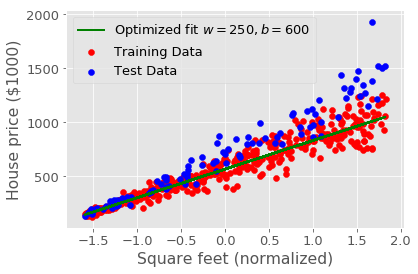

In [19]:
plt.scatter(X_train,Y_train, color='r', label='Training Data')
plt.scatter(X_test,Y_test, color='b', label='Test Data')
plt.plot(X_test,Yhat_test, color='g', linewidth=2, label=r'Optimized fit $w=250,b=600$')
plt.xlabel('Square feet (normalized)')
plt.ylabel('House price ($1000)')
plt.legend()
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fig_path+'house_final.pdf',dpi=600)
plt.show()